In [43]:
import csv
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf

from math import sqrt
from numpy.random import seed
seed(1)
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM
import tensorflow as tf

In [4]:
df = pd.read_csv('dccelectricitycivicsblocks34p20130221-1840.csv')
df

,Civic Offices Blocks 3 and 4 KWh,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97
0,Date,Values,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
1,29/03/2011,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.80000305,31.20000076,31.65000153,30.60000038,32.85000229,31.05000305,32.10000229,31.35000229,31.65000153,30.15000153
2,30/03/2011,96,32.10000229,32.40000153,33.60000229,33,29.70000076,30.90000153,31.50000191,33,...,35.70000076,33.60000229,34.20000076,34.80000305,34.65000153,33.75,33.15000153,32.70000076,31.50000191,33.60000229
3,31/03/2011,96,32.10000229,33.60000229,35.10000229,33.45000076,31.20000076,31.35000038,34.20000076,33.75,...,33,33,35.25,34.35000229,32.40000153,31.20000076,32.84999847,33.45000076,32.10000229,32.10000229
4,01/04/2011,96,32.70000076,34.5,30.30000305,33,33,31.5,30.30000305,32.84999847,...,32.25,33.45000076,33,30.45000076,33.15000153,30.60000229,30.15000153,32.55000305,33,30.15000153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,16/02/2013,96,25,25,24.5,24.5,24.5,26.5,25,25.5,...,24.5,24,24.5,26,24.5,24,25,24.5,25,24
692,17/02/2013,96,24.5,24,24,24.5,24,24,24.5,24,...,25,25,25,25.5,26.5,25.5,24.5,25,25,25
693,18/02/2013,96,25,25,24.5,26.5,23,24.5,25,25,...,31,30,28,27,28.5,25.5,25.5,25.5,27,26.5
694,19/02/2013,96,25.5,24.5,27,24,24,25.5,27.5,25.5,...,30,30,30,30,28,28.5,26.5,25,25.5,26.5


In [6]:
df2 = df.rename(columns=df.iloc[0])

In [8]:
df3 = df2.drop(df.index[0])

In [12]:
df3

,Date,Values,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
1,29/03/2011,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.80000305,31.20000076,31.65000153,30.60000038,32.85000229,31.05000305,32.10000229,31.35000229,31.65000153,30.15000153
2,30/03/2011,96,32.10000229,32.40000153,33.60000229,33,29.70000076,30.90000153,31.50000191,33,...,35.70000076,33.60000229,34.20000076,34.80000305,34.65000153,33.75,33.15000153,32.70000076,31.50000191,33.60000229
3,31/03/2011,96,32.10000229,33.60000229,35.10000229,33.45000076,31.20000076,31.35000038,34.20000076,33.75,...,33,33,35.25,34.35000229,32.40000153,31.20000076,32.84999847,33.45000076,32.10000229,32.10000229
4,01/04/2011,96,32.70000076,34.5,30.30000305,33,33,31.5,30.30000305,32.84999847,...,32.25,33.45000076,33,30.45000076,33.15000153,30.60000229,30.15000153,32.55000305,33,30.15000153
5,02/04/2011,96,31.80000114,32.40000153,30.45000076,33.90000153,33.30000305,30.75000191,30.75,29.85000038,...,34.5,31.80000114,32.10000229,31.80000114,35.25,34.65000153,30.45000076,31.5,33.45000076,32.55000305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,16/02/2013,96,25,25,24.5,24.5,24.5,26.5,25,25.5,...,24.5,24,24.5,26,24.5,24,25,24.5,25,24
692,17/02/2013,96,24.5,24,24,24.5,24,24,24.5,24,...,25,25,25,25.5,26.5,25.5,24.5,25,25,25
693,18/02/2013,96,25,25,24.5,26.5,23,24.5,25,25,...,31,30,28,27,28.5,25.5,25.5,25.5,27,26.5
694,19/02/2013,96,25.5,24.5,27,24,24,25.5,27.5,25.5,...,30,30,30,30,28,28.5,26.5,25,25.5,26.5


In [13]:
df3.drop(df3.index[0])

,Date,Values,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
2,30/03/2011,96,32.10000229,32.40000153,33.60000229,33,29.70000076,30.90000153,31.50000191,33,...,35.70000076,33.60000229,34.20000076,34.80000305,34.65000153,33.75,33.15000153,32.70000076,31.50000191,33.60000229
3,31/03/2011,96,32.10000229,33.60000229,35.10000229,33.45000076,31.20000076,31.35000038,34.20000076,33.75,...,33,33,35.25,34.35000229,32.40000153,31.20000076,32.84999847,33.45000076,32.10000229,32.10000229
4,01/04/2011,96,32.70000076,34.5,30.30000305,33,33,31.5,30.30000305,32.84999847,...,32.25,33.45000076,33,30.45000076,33.15000153,30.60000229,30.15000153,32.55000305,33,30.15000153
5,02/04/2011,96,31.80000114,32.40000153,30.45000076,33.90000153,33.30000305,30.75000191,30.75,29.85000038,...,34.5,31.80000114,32.10000229,31.80000114,35.25,34.65000153,30.45000076,31.5,33.45000076,32.55000305
6,03/04/2011,96,32.85000229,30.30000114,32.10000229,30,34.05000305,30.75000191,32.10000229,28.80000114,...,34.95000076,31.80000114,35.10000229,33.90000153,31.35000038,35.10000229,35.10000229,33.90000153,31.35000038,35.10000229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,16/02/2013,96,25,25,24.5,24.5,24.5,26.5,25,25.5,...,24.5,24,24.5,26,24.5,24,25,24.5,25,24
692,17/02/2013,96,24.5,24,24,24.5,24,24,24.5,24,...,25,25,25,25.5,26.5,25.5,24.5,25,25,25
693,18/02/2013,96,25,25,24.5,26.5,23,24.5,25,25,...,31,30,28,27,28.5,25.5,25.5,25.5,27,26.5
694,19/02/2013,96,25.5,24.5,27,24,24,25.5,27.5,25.5,...,30,30,30,30,28,28.5,26.5,25,25.5,26.5


In [16]:
df4=df3.drop('Date', axis=1)
df4

,Values,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,02:00,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
1,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.80000305,31.20000076,31.65000153,30.60000038,32.85000229,31.05000305,32.10000229,31.35000229,31.65000153,30.15000153
2,96,32.10000229,32.40000153,33.60000229,33,29.70000076,30.90000153,31.50000191,33,31.5,...,35.70000076,33.60000229,34.20000076,34.80000305,34.65000153,33.75,33.15000153,32.70000076,31.50000191,33.60000229
3,96,32.10000229,33.60000229,35.10000229,33.45000076,31.20000076,31.35000038,34.20000076,33.75,34.65000153,...,33,33,35.25,34.35000229,32.40000153,31.20000076,32.84999847,33.45000076,32.10000229,32.10000229
4,96,32.70000076,34.5,30.30000305,33,33,31.5,30.30000305,32.84999847,33.15000153,...,32.25,33.45000076,33,30.45000076,33.15000153,30.60000229,30.15000153,32.55000305,33,30.15000153
5,96,31.80000114,32.40000153,30.45000076,33.90000153,33.30000305,30.75000191,30.75,29.85000038,28.80000114,...,34.5,31.80000114,32.10000229,31.80000114,35.25,34.65000153,30.45000076,31.5,33.45000076,32.55000305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,96,25,25,24.5,24.5,24.5,26.5,25,25.5,25,...,24.5,24,24.5,26,24.5,24,25,24.5,25,24
692,96,24.5,24,24,24.5,24,24,24.5,24,24,...,25,25,25,25.5,26.5,25.5,24.5,25,25,25
693,96,25,25,24.5,26.5,23,24.5,25,25,24.5,...,31,30,28,27,28.5,25.5,25.5,25.5,27,26.5
694,96,25.5,24.5,27,24,24,25.5,27.5,25.5,26,...,30,30,30,30,28,28.5,26.5,25,25.5,26.5


In [17]:
df5=df4.drop('Values', axis=1)
df5

,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,02:00,02:15,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.80000305,31.20000076,31.65000153,30.60000038,32.85000229,31.05000305,32.10000229,31.35000229,31.65000153,30.15000153
2,32.10000229,32.40000153,33.60000229,33,29.70000076,30.90000153,31.50000191,33,31.5,30.00000191,...,35.70000076,33.60000229,34.20000076,34.80000305,34.65000153,33.75,33.15000153,32.70000076,31.50000191,33.60000229
3,32.10000229,33.60000229,35.10000229,33.45000076,31.20000076,31.35000038,34.20000076,33.75,34.65000153,35.25,...,33,33,35.25,34.35000229,32.40000153,31.20000076,32.84999847,33.45000076,32.10000229,32.10000229
4,32.70000076,34.5,30.30000305,33,33,31.5,30.30000305,32.84999847,33.15000153,32.70000076,...,32.25,33.45000076,33,30.45000076,33.15000153,30.60000229,30.15000153,32.55000305,33,30.15000153
5,31.80000114,32.40000153,30.45000076,33.90000153,33.30000305,30.75000191,30.75,29.85000038,28.80000114,33.45000076,...,34.5,31.80000114,32.10000229,31.80000114,35.25,34.65000153,30.45000076,31.5,33.45000076,32.55000305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,25,25,24.5,24.5,24.5,26.5,25,25.5,25,25.5,...,24.5,24,24.5,26,24.5,24,25,24.5,25,24
692,24.5,24,24,24.5,24,24,24.5,24,24,25.5,...,25,25,25,25.5,26.5,25.5,24.5,25,25,25
693,25,25,24.5,26.5,23,24.5,25,25,24.5,25.5,...,31,30,28,27,28.5,25.5,25.5,25.5,27,26.5
694,25.5,24.5,27,24,24,25.5,27.5,25.5,26,26,...,30,30,30,30,28,28.5,26.5,25,25.5,26.5


In [19]:
df6=df5.dropna()
df6

,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,02:00,02:15,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
2,32.10000229,32.40000153,33.60000229,33,29.70000076,30.90000153,31.50000191,33,31.5,30.00000191,...,35.70000076,33.60000229,34.20000076,34.80000305,34.65000153,33.75,33.15000153,32.70000076,31.50000191,33.60000229
3,32.10000229,33.60000229,35.10000229,33.45000076,31.20000076,31.35000038,34.20000076,33.75,34.65000153,35.25,...,33,33,35.25,34.35000229,32.40000153,31.20000076,32.84999847,33.45000076,32.10000229,32.10000229
5,31.80000114,32.40000153,30.45000076,33.90000153,33.30000305,30.75000191,30.75,29.85000038,28.80000114,33.45000076,...,34.5,31.80000114,32.10000229,31.80000114,35.25,34.65000153,30.45000076,31.5,33.45000076,32.55000305
6,32.85000229,30.30000114,32.10000229,30,34.05000305,30.75000191,32.10000229,28.80000114,33.60000229,29.70000267,...,34.95000076,31.80000114,35.10000229,33.90000153,31.35000038,35.10000229,35.10000229,33.90000153,31.35000038,35.10000229
7,32.25000381,35.40000153,37.34999847,34.35000229,34.95000076,36.45000076,36.15000153,33.15000153,34.05000305,33.15000153,...,32.55000305,31.65000153,32.10000229,31.95000076,29.39999962,30.75,31.95000076,31.35000229,32.70000076,30.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,25,25,24.5,24.5,24.5,26.5,25,25.5,25,25.5,...,24.5,24,24.5,26,24.5,24,25,24.5,25,24
692,24.5,24,24,24.5,24,24,24.5,24,24,25.5,...,25,25,25,25.5,26.5,25.5,24.5,25,25,25
693,25,25,24.5,26.5,23,24.5,25,25,24.5,25.5,...,31,30,28,27,28.5,25.5,25.5,25.5,27,26.5
694,25.5,24.5,27,24,24,25.5,27.5,25.5,26,26,...,30,30,30,30,28,28.5,26.5,25,25.5,26.5


In [20]:
df7=df6.values
df7

array([['32.10000229', '32.40000153', '33.60000229', ..., '32.70000076',
        '31.50000191', '33.60000229'],
       ['32.10000229', '33.60000229', '35.10000229', ..., '33.45000076',
        '32.10000229', '32.10000229'],
       ['31.80000114', '32.40000153', '30.45000076', ..., '31.5',
        '33.45000076', '32.55000305'],
       ...,
       ['25', '25', '24.5', ..., '25.5', '27', '26.5'],
       ['25.5', '24.5', '27', ..., '25', '25.5', '26.5'],
       ['25', '24.5', '24.5', ..., '26', '26.5', '26.5']], dtype=object)

In [21]:
dataset=np.sum(df7, axis=1, dtype=float)
dataset

array([4981.5001927 , 5166.60016445, 3046.35014537, 3101.10013769,
       4908.60016439, 4858.50017742, 4905.00019836, 4999.95019526,
       3075.90013122, 3023.5501442 , 5004.6001587 , 5199.30019957,
       5226.75017163, 5162.55022428, 4991.55017468, 2950.20010378,
       4883.85017776, 5055.15017129, 5084.10021592, 4914.00019451,
       3581.55014991, 2981.55008892, 2967.00011064, 3515.70014566,
       4721.10016438, 4931.85019494, 5020.05018234, 4799.40017322,
       3043.20012856, 2929.05012318, 3423.45014192, 4949.55017475,
       5155.05015188, 5238.75021174, 5129.10016059, 3088.95013995,
       3017.40010454, 5041.95018196, 5170.80017096, 5250.90023994,
       5239.35021975, 5163.60019308, 3169.65013694, 3034.65012932,
       5056.05021094, 5052.6001988 , 5048.2501869 , 4971.75019264,
       3013.20013239, 2919.45011703, 4830.0002022 , 5007.90018087,
       5028.00018885, 5088.60017207, 5092.35015869, 3069.90011787,
       2909.85011099, 4923.60022544, 5136.75021744, 5233.65021

In [22]:
tseries=dataset
tseries

array([4981.5001927 , 5166.60016445, 3046.35014537, 3101.10013769,
       4908.60016439, 4858.50017742, 4905.00019836, 4999.95019526,
       3075.90013122, 3023.5501442 , 5004.6001587 , 5199.30019957,
       5226.75017163, 5162.55022428, 4991.55017468, 2950.20010378,
       4883.85017776, 5055.15017129, 5084.10021592, 4914.00019451,
       3581.55014991, 2981.55008892, 2967.00011064, 3515.70014566,
       4721.10016438, 4931.85019494, 5020.05018234, 4799.40017322,
       3043.20012856, 2929.05012318, 3423.45014192, 4949.55017475,
       5155.05015188, 5238.75021174, 5129.10016059, 3088.95013995,
       3017.40010454, 5041.95018196, 5170.80017096, 5250.90023994,
       5239.35021975, 5163.60019308, 3169.65013694, 3034.65012932,
       5056.05021094, 5052.6001988 , 5048.2501869 , 4971.75019264,
       3013.20013239, 2919.45011703, 4830.0002022 , 5007.90018087,
       5028.00018885, 5088.60017207, 5092.35015869, 3069.90011787,
       2909.85011099, 4923.60022544, 5136.75021744, 5233.65021

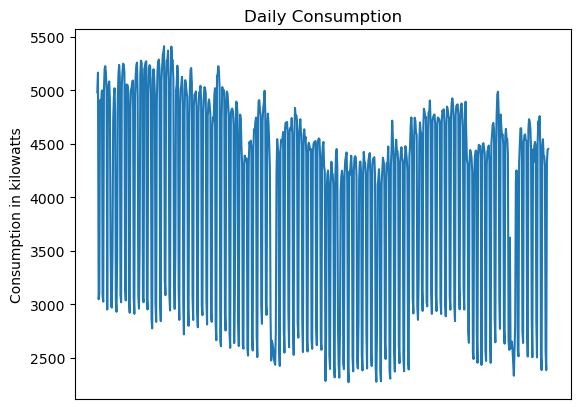

In [24]:
plt.plot(tseries)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('Consumption in kilowatts')
plt.title("Daily Consumption")
plt.show()

In [25]:
df=pd.DataFrame(tseries)
df

,0
0,4981.500193
1,5166.600164
2,3046.350145
3,3101.100138
4,4908.600164
...,...
678,2564.000000
679,2383.000000
680,4321.000000
681,4444.000000


In [73]:
df = np.array(df)
len(df)
df

array([[4981.5001927 ],
       [5166.60016445],
       [3046.35014537],
       [3101.10013769],
       [4908.60016439],
       [4858.50017742],
       [4905.00019836],
       [4999.95019526],
       [3075.90013122],
       [3023.5501442 ],
       [5004.6001587 ],
       [5199.30019957],
       [5226.75017163],
       [5162.55022428],
       [4991.55017468],
       [2950.20010378],
       [4883.85017776],
       [5055.15017129],
       [5084.10021592],
       [4914.00019451],
       [3581.55014991],
       [2981.55008892],
       [2967.00011064],
       [3515.70014566],
       [4721.10016438],
       [4931.85019494],
       [5020.05018234],
       [4799.40017322],
       [3043.20012856],
       [2929.05012318],
       [3423.45014192],
       [4949.55017475],
       [5155.05015188],
       [5238.75021174],
       [5129.10016059],
       [3088.95013995],
       [3017.40010454],
       [5041.95018196],
       [5170.80017096],
       [5250.90023994],
       [5239.35021975],
       [5163.600

In [29]:
#Train and test data partition
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size

In [31]:
train, test = df[0:train_size,:], df[train_size:len(df),:]

In [32]:
def create_dataset(df, previous=1):
    dataX, dataY = [], []
    for i in range(len(df)-previous-1):
        a = df[i:(i+previous), 0]
        dataX.append(a)
        dataY.append(df[i + previous, 0])
    return np.array(dataX), np.array(dataY)

In [33]:
df

array([[4981.5001927 ],
       [5166.60016445],
       [3046.35014537],
       [3101.10013769],
       [4908.60016439],
       [4858.50017742],
       [4905.00019836],
       [4999.95019526],
       [3075.90013122],
       [3023.5501442 ],
       [5004.6001587 ],
       [5199.30019957],
       [5226.75017163],
       [5162.55022428],
       [4991.55017468],
       [2950.20010378],
       [4883.85017776],
       [5055.15017129],
       [5084.10021592],
       [4914.00019451],
       [3581.55014991],
       [2981.55008892],
       [2967.00011064],
       [3515.70014566],
       [4721.10016438],
       [4931.85019494],
       [5020.05018234],
       [4799.40017322],
       [3043.20012856],
       [2929.05012318],
       [3423.45014192],
       [4949.55017475],
       [5155.05015188],
       [5238.75021174],
       [5129.10016059],
       [3088.95013995],
       [3017.40010454],
       [5041.95018196],
       [5170.80017096],
       [5250.90023994],
       [5239.35021975],
       [5163.600

In [34]:
#Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train)
train

array([[0.86253241],
       [0.921413  ],
       [0.24695818],
       [0.26437424],
       [0.8393428 ],
       [0.82340591],
       [0.83819764],
       [0.86840138],
       [0.25635808],
       [0.23970547],
       [0.86988054],
       [0.93181493],
       [0.94054681],
       [0.92012471],
       [0.86572932],
       [0.21637271],
       [0.83146979],
       [0.88596058],
       [0.89516964],
       [0.84106056],
       [0.41720613],
       [0.22634519],
       [0.22171681],
       [0.39625915],
       [0.77969876],
       [0.84673867],
       [0.87479522],
       [0.80460611],
       [0.24595616],
       [0.20964486],
       [0.36691428],
       [0.85236906],
       [0.91773892],
       [0.94436404],
       [0.90948419],
       [0.26050931],
       [0.23774913],
       [0.88176165],
       [0.92274903],
       [0.94822898],
       [0.9445549 ],
       [0.9204587 ],
       [0.2861801 ],
       [0.24323639],
       [0.88624689],
       [0.88514943],
       [0.88376569],
       [0.859

In [35]:
test = scaler.fit_transform(test)
test

array([[0.91738803],
       [0.31802785],
       [0.23372224],
       [0.91305984],
       [0.95013173],
       [0.95859992],
       [0.92096349],
       [0.86789612],
       [0.30466692],
       [0.2331577 ],
       [0.89593527],
       [0.96499812],
       [0.85001882],
       [0.76176139],
       [0.74275499],
       [0.15619119],
       [0.11610839],
       [0.75442228],
       [0.79488145],
       [0.78547234],
       [0.76778321],
       [0.71885585],
       [0.08242379],
       [0.05871283],
       [0.69777945],
       [0.76721867],
       [0.79092962],
       [0.79281144],
       [0.14753481],
       [0.04554008],
       [0.78001505],
       [0.81313511],
       [0.80447874],
       [0.80955965],
       [0.76439594],
       [0.03820098],
       [0.75649228],
       [0.81595785],
       [0.81878058],
       [0.80127964],
       [0.78152051],
       [0.08731652],
       [0.05212646],
       [0.74294317],
       [0.79036507],
       [0.797516  ],
       [0.81050056],
       [0.754

In [36]:
# Lookback period
lookback = 5
X_train, Y_train = create_dataset(train, lookback)
X_test, Y_test = create_dataset(test, lookback)

In [37]:
X_train

array([[0.86253241, 0.921413  , 0.24695818, 0.26437424, 0.8393428 ],
       [0.921413  , 0.24695818, 0.26437424, 0.8393428 , 0.82340591],
       [0.24695818, 0.26437424, 0.8393428 , 0.82340591, 0.83819764],
       ...,
       [0.84471866, 0.82467826, 0.77903069, 0.2258521 , 0.18179503],
       [0.82467826, 0.77903069, 0.2258521 , 0.18179503, 0.79525387],
       [0.77903069, 0.2258521 , 0.18179503, 0.79525387, 0.82276966]])

In [38]:
Y_train

array([0.82340591, 0.83819764, 0.86840138, 0.25635808, 0.23970547,
       0.86988054, 0.93181493, 0.94054681, 0.92012471, 0.86572932,
       0.21637271, 0.83146979, 0.88596058, 0.89516964, 0.84106056,
       0.41720613, 0.22634519, 0.22171681, 0.39625915, 0.77969876,
       0.84673867, 0.87479522, 0.80460611, 0.24595616, 0.20964486,
       0.36691428, 0.85236906, 0.91773892, 0.94436404, 0.90948419,
       0.26050931, 0.23774913, 0.88176165, 0.92274903, 0.94822898,
       0.9445549 , 0.9204587 , 0.2861801 , 0.24323639, 0.88624689,
       0.88514943, 0.88376569, 0.85943092, 0.23641311, 0.20659109,
       0.81434003, 0.87093029, 0.87732413, 0.89660108, 0.89779396,
       0.25444947, 0.20353731, 0.84411434, 0.91191768, 0.94274172,
       0.95123503, 0.85303708, 0.25678752, 0.21890162, 0.40231898,
       0.91535317, 0.957104  , 0.95075787, 0.89197271, 0.25201599,
       0.23794   , 0.93157636, 0.9404991 , 0.95280964, 0.95514767,
       0.25025053, 0.21642042, 0.8609578 , 0.93424841, 0.94355

In [39]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [41]:
X_train.shape[1]

1

In [44]:
# Generate LSTM network
model = tf.keras.Sequential()
model.add(LSTM(4, input_shape=(1, lookback)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
432/432 - 3s - loss: 0.2215 - val_loss: 0.0871 - 3s/epoch - 6ms/step
Epoch 2/100
432/432 - 1s - loss: 0.0993 - val_loss: 0.0731 - 825ms/epoch - 2ms/step
Epoch 3/100
432/432 - 1s - loss: 0.0857 - val_loss: 0.0604 - 772ms/epoch - 2ms/step
Epoch 4/100
432/432 - 1s - loss: 0.0720 - val_loss: 0.0504 - 792ms/epoch - 2ms/step
Epoch 5/100
432/432 - 1s - loss: 0.0635 - val_loss: 0.0450 - 772ms/epoch - 2ms/step
Epoch 6/100
432/432 - 1s - loss: 0.0594 - val_loss: 0.0461 - 778ms/epoch - 2ms/step
Epoch 7/100
432/432 - 1s - loss: 0.0575 - val_loss: 0.0416 - 821ms/epoch - 2ms/step
Epoch 8/100
432/432 - 1s - loss: 0.0560 - val_loss: 0.0381 - 770ms/epoch - 2ms/step
Epoch 9/100
432/432 - 1s - loss: 0.0543 - val_loss: 0.0373 - 763ms/epoch - 2ms/step
Epoch 10/100
432/432 - 1s - loss: 0.0530 - val_loss: 0.0355 - 750ms/epoch - 2ms/step
Epoch 11/100
432/432 - 1s - loss: 0.0518 - val_loss: 0.0354 - 745ms/epoch - 2ms/step
Epoch 12/100
432/432 - 1s - loss: 0.0506 - val_loss: 0.0338 - 784ms/epoch - 2

Epoch 98/100
432/432 - 1s - loss: 0.0174 - val_loss: 0.0106 - 790ms/epoch - 2ms/step
Epoch 99/100
432/432 - 1s - loss: 0.0170 - val_loss: 0.0127 - 817ms/epoch - 2ms/step
Epoch 100/100
432/432 - 1s - loss: 0.0174 - val_loss: 0.0122 - 820ms/epoch - 2ms/step


dict_keys(['loss', 'val_loss'])


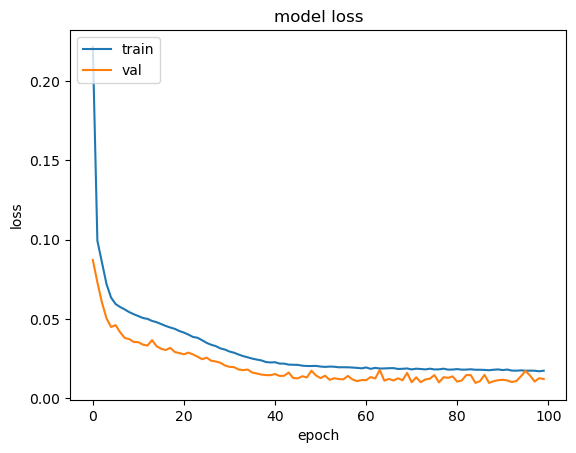

In [45]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [46]:
# Generate predictions
trainpred = model.predict(X_train)
testpred = model.predict(X_test)

5/5 [==============================] - 0s 1ms/step


In [47]:
trainpred

array([[ 8.25017691e-01],
       [ 6.73461139e-01],
       [ 7.87540615e-01],
       [ 6.57079101e-01],
       [ 2.86483318e-02],
       [ 6.19654477e-01],
       [ 8.71732950e-01],
       [ 9.36812580e-01],
       [ 9.67171788e-01],
       [ 6.86237931e-01],
       [ 1.70457676e-01],
       [ 2.41131470e-01],
       [ 6.90326333e-01],
       [ 6.32956564e-01],
       [ 4.99191463e-01],
       [ 5.79685688e-01],
       [ 4.38366383e-02],
       [ 5.71470261e-01],
       [ 6.16511941e-01],
       [ 3.46464157e-01],
       [ 8.43999147e-01],
       [ 9.69233632e-01],
       [ 8.69517148e-01],
       [ 4.17748153e-01],
       [ 7.48477429e-02],
       [ 6.70458436e-01],
       [ 5.52461922e-01],
       [ 8.61018240e-01],
       [ 1.07325470e+00],
       [ 9.80172634e-01],
       [ 5.75719833e-01],
       [ 9.15426165e-02],
       [ 7.71666586e-01],
       [ 8.74858975e-01],
       [ 8.94652069e-01],
       [ 9.75669384e-01],
       [ 7.44176686e-01],
       [ 2.19933689e-01],
       [ 1.4

In [48]:
testpred

array([[ 0.92792314],
       [ 0.9530438 ],
       [ 0.6568543 ],
       [ 0.15573399],
       [ 0.21438502],
       [ 0.74342465],
       [ 0.8778043 ],
       [ 0.9911984 ],
       [ 0.7415403 ],
       [ 0.33202475],
       [ 0.20772357],
       [ 0.31068885],
       [ 0.6818501 ],
       [ 0.81096816],
       [ 0.8189819 ],
       [ 0.79548424],
       [ 0.59866196],
       [ 0.17881593],
       [ 0.17850448],
       [ 0.7059194 ],
       [ 0.78841305],
       [ 0.81269014],
       [ 0.84920275],
       [ 0.7235605 ],
       [-0.00823553],
       [ 0.68171394],
       [ 0.8803311 ],
       [ 0.8601843 ],
       [ 0.8302502 ],
       [ 0.7141929 ],
       [ 0.19579242],
       [ 0.19992495],
       [ 0.73398966],
       [ 0.7170361 ],
       [ 0.53754956],
       [ 0.7048961 ],
       [ 0.22310244],
       [ 0.16849567],
       [ 0.76174587],
       [ 0.85037225],
       [ 0.83171624],
       [ 0.84718263],
       [ 0.73784244],
       [ 0.19672024],
       [ 0.13227148],
       [ 0

In [49]:
# Convert predictions back to normal values
trainpred = scaler.inverse_transform(trainpred)
Y_train = scaler.inverse_transform([Y_train])
testpred = scaler.inverse_transform(testpred)
Y_test = scaler.inverse_transform([Y_test])
predictions = testpred

In [50]:
Y_train.shape

(1, 540)

In [51]:
Y_test.shape

(1, 131)

In [52]:
X_train.shape

(540, 1, 5)

In [53]:
X_test.shape

(131, 1, 5)

In [54]:
Y_train

array([[4518.28951509, 4557.59113815, 4637.8424781 , 3011.6434176 ,
        2967.39742769, 4641.77260773, 4806.33226731, 4829.53286879,
        4775.27134202, 4630.74281586, 2905.40228055, 4539.71522927,
        4684.49726678, 4708.96572332, 4565.19789723, 3439.01669686,
        2931.89915677, 2919.60157603, 3383.3605489 , 4402.1595992 ,
        4580.28464288, 4654.83090304, 4468.33843892, 2984.00551222,
        2887.52640548, 3305.39123188, 4595.24459172, 4768.93231222,
        4839.67525246, 4746.9994882 , 3022.67323035, 2962.19943991,
        4673.34069105, 4782.24416242, 4849.94440544, 4840.18237672,
        4776.15877125, 3090.88053001, 2976.77908865, 4685.25797653,
        4682.34204071, 4678.66542886, 4614.00795392, 2958.64964103,
        2879.41252047, 4494.20145533, 4644.56177266, 4661.55021527,
        4712.76906743, 4715.93854042, 3006.57223143, 2871.29863554,
        4573.31180319, 4753.46528423, 4835.36475348, 4857.93146626,
        4597.01951125, 3012.78443227, 2912.12160

In [55]:
Y_test

array([[4877.5, 4777.5, 4636.5, 3140. , 2950. , 4711. , 4894.5, 4589. ,
        4354.5, 4304. , 2745.5, 2639. , 4335. , 4442.5, 4417.5, 4370.5,
        4240.5, 2549.5, 2486.5, 4184.5, 4369. , 4432. , 4437. , 2722.5,
        2451.5, 4403. , 4491. , 4468. , 4481.5, 4361.5, 2432. , 4340.5,
        4498.5, 4506. , 4459.5, 4407. , 2562.5, 2469. , 4304.5, 4430.5,
        4449.5, 4484. , 4335. , 2695. , 2451. , 4500. , 4581. , 4679. ,
        4696. , 4632.5, 2873. , 2643. , 4475. , 4771. , 4965. , 4987.5,
        4809. , 3042.5, 2769. , 4774.5, 4660.5, 4576. , 4589. , 4491.5,
        2774.5, 2630.5, 4564. , 4640. , 4540.5, 4547.5, 4399. , 2658.5,
        2572.5, 3622.5, 2584.5, 2599.5, 2650. , 2576. , 2460. , 2330.5,
        2560.5, 2803. , 4152. , 4252. , 4177.5, 2566.5, 2512. , 4333.5,
        4477.5, 4644.5, 4646.5, 4487.5, 2741.5, 2637. , 4518. , 4579.5,
        4589. , 4537. , 4526. , 2771. , 2510. , 4639. , 4731. , 4709.5,
        4638.5, 4454. , 2869.5, 2503.5, 4448.5, 4329.5, 4482. , 

In [56]:
X_train

array([[[0.86253241, 0.921413  , 0.24695818, 0.26437424, 0.8393428 ]],

       [[0.921413  , 0.24695818, 0.26437424, 0.8393428 , 0.82340591]],

       [[0.24695818, 0.26437424, 0.8393428 , 0.82340591, 0.83819764]],

       ...,

       [[0.84471866, 0.82467826, 0.77903069, 0.2258521 , 0.18179503]],

       [[0.82467826, 0.77903069, 0.2258521 , 0.18179503, 0.79525387]],

       [[0.77903069, 0.2258521 , 0.18179503, 0.79525387, 0.82276966]]])

In [57]:
X_test

array([[[0.91738803, 0.31802785, 0.23372224, 0.91305984, 0.95013173]],

       [[0.31802785, 0.23372224, 0.91305984, 0.95013173, 0.95859992]],

       [[0.23372224, 0.91305984, 0.95013173, 0.95859992, 0.92096349]],

       [[0.91305984, 0.95013173, 0.95859992, 0.92096349, 0.86789612]],

       [[0.95013173, 0.95859992, 0.92096349, 0.86789612, 0.30466692]],

       [[0.95859992, 0.92096349, 0.86789612, 0.30466692, 0.2331577 ]],

       [[0.92096349, 0.86789612, 0.30466692, 0.2331577 , 0.89593527]],

       [[0.86789612, 0.30466692, 0.2331577 , 0.89593527, 0.96499812]],

       [[0.30466692, 0.2331577 , 0.89593527, 0.96499812, 0.85001882]],

       [[0.2331577 , 0.89593527, 0.96499812, 0.85001882, 0.76176139]],

       [[0.89593527, 0.96499812, 0.85001882, 0.76176139, 0.74275499]],

       [[0.96499812, 0.85001882, 0.76176139, 0.74275499, 0.15619119]],

       [[0.85001882, 0.76176139, 0.74275499, 0.15619119, 0.11610839]],

       [[0.76176139, 0.74275499, 0.15619119, 0.11610839, 0.75442

In [58]:
#Prediction Accuracy
# calculate RMSE
trainScore = math.sqrt(mean_squared_error(Y_train[0], trainpred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
valScore = math.sqrt(mean_squared_error(Y_test[0], testpred[:,0]))
print('Test Score: %.2f RMSE' % (valScore))

Train Score: 335.40 RMSE
Test Score: 396.68 RMSE


In [59]:
# Train predictions
trainpredPlot = np.empty_like(df)
trainpredPlot[:, :] = np.nan
trainpredPlot[lookback:len(trainpred)+lookback, :] = trainpred

In [60]:
# Test predictions
testpredPlot = np.empty_like(df)
testpredPlot[:, :] = np.nan
testpredPlot[len(trainpred)+(lookback*2)+1:len(df)-1, :] = testpred

In [61]:
Y_test=Y_test.reshape(-1)
Y_test.shape
Y_test=pd.Series(Y_test)

In [62]:
Y_test

0      4877.5
1      4777.5
2      4636.5
3      3140.0
4      2950.0
        ...  
126    4289.5
127    2564.0
128    2383.0
129    4321.0
130    4444.0
Length: 131, dtype: float64

In [63]:
predictions=predictions.reshape(-1)
predictions.shape
predictions=pd.Series(predictions)

In [64]:
predictions

0      4795.991699
1      4862.737305
2      4075.761719
3      2744.285156
4      2900.121094
          ...     
126    4019.595459
127    2842.349365
128    2814.585205
129    4223.475586
130    4621.210449
Length: 131, dtype: float32

In [65]:
import numpy as np

def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [72]:
mda(Y_test, predictions)

0.9847328244274809

In [67]:
# https://machinelearningmastery.com/time-series-forecasting-performance-measures-with-python/

mse = mean_squared_error(Y_test, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 396.681648


In [68]:
np.mean(Y_test)

3891.038167938931

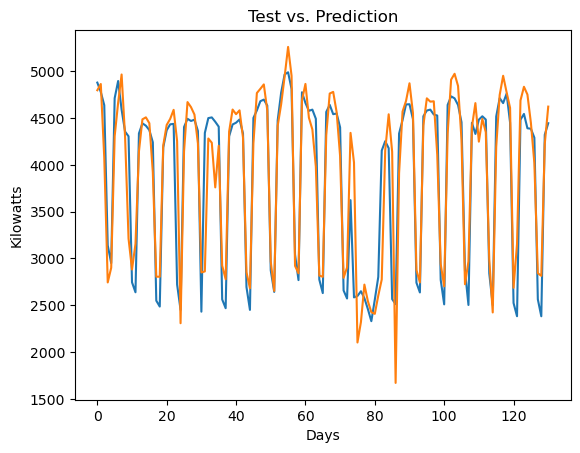

In [70]:
plt.plot(Y_test)
plt.plot(predictions)
plt.xlabel('Days')
plt.ylabel('Kilowatts')
plt.title("Test vs. Prediction")
plt.show()